In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import json
import itertools
import seaborn as sb

In [2]:
predictions = pd.read_csv('predicted_results/prediction_original_modified.csv')

In [3]:
predictions.head()

,NEW_PREDICTED,Descript,Category
0,ARSON,ARSON OF A VEHICLE,ARSON
1,ARSON,ARSON OF A VEHICLE,ARSON
2,ARSON,FIRE UNLAWFULLY CAUSING,ARSON
3,ARSON,ARSON OF A VEHICLE,ARSON
4,ARSON,ARSON,ARSON


In [4]:
# predictions = predictions[0:7000]
labels = pd.concat([predictions['NEW_PREDICTED'],predictions['Category']])

In [5]:
# function to get unique values 
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

In [6]:
labels = unique(labels)
labels, len(labels)

(['LOITERING',
  'PROSTITUTION',
  'STOLEN PROPERTY',
  'VEHICLE THEFT',
  'DISORDERLY CONDUCT',
  'ARSON',
  'EXTORTION',
  'MISSING PERSON',
  'TRESPASS',
  'ASSAULT',
  'KIDNAPPING',
  'PORNOGRAPHY/OBSCENE MAT',
  'FRAUD',
  'SECONDARY CODES',
  'LIQUOR LAWS',
  'DRIVING UNDER THE INFLUENCE',
  'WEAPON LAWS',
  'SEX OFFENSES FORCIBLE',
  'NON-CRIMINAL',
  'RECOVERED VEHICLE',
  'LARCENY/THEFT',
  'RUNAWAY',
  'ROBBERY',
  'DRUNKENNESS',
  'BRIBERY',
  'WARRANTS',
  'SUSPICIOUS OCC',
  'VANDALISM',
  'EMBEZZLEMENT',
  'SUICIDE',
  'SEX OFFENSES NON FORCIBLE',
  'OTHER OFFENSES',
  'FORGERY/COUNTERFEITING',
  'BURGLARY',
  'FAMILY OFFENSES',
  'BAD CHECKS',
  'DRUG/NARCOTIC'],
 37)

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
cnf_matrix = confusion_matrix(y_true=predictions['Category'],y_pred=predictions['NEW_PREDICTED'])

Normalized confusion matrix


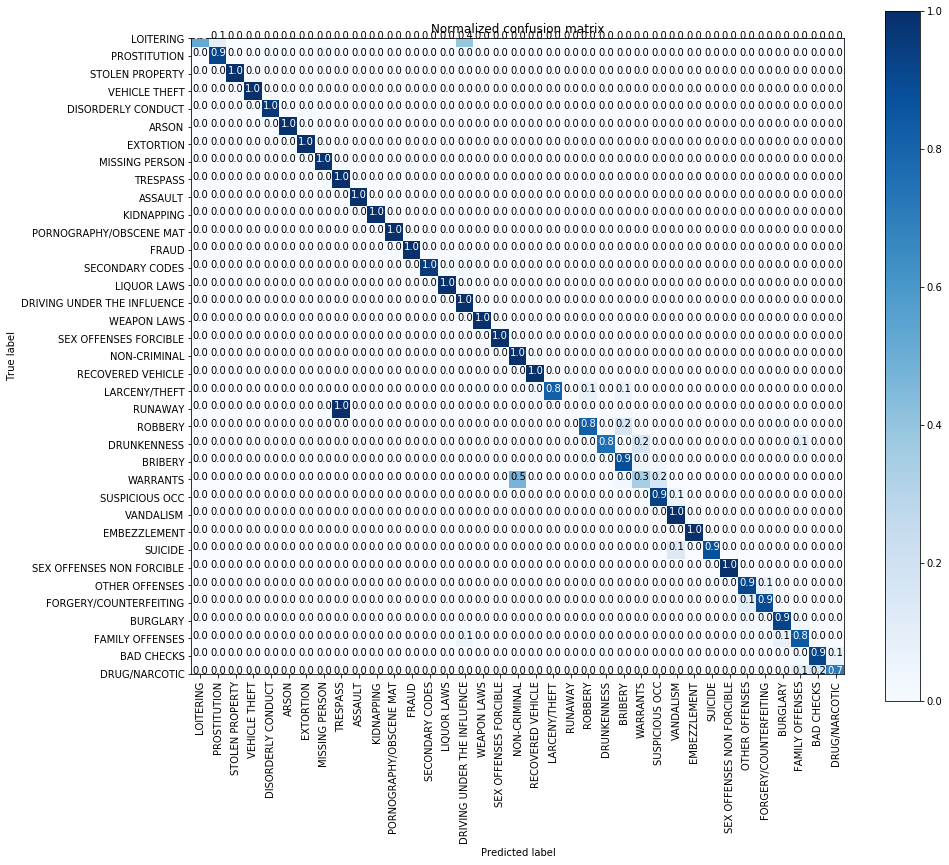

In [9]:
# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(labels), normalize=True,
                      title='Normalized confusion matrix')

fig.savefig("txt_classification-smote" + ".png", pad_inches=5.0)

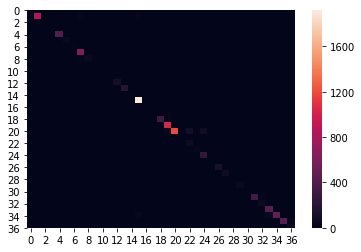

In [10]:
cnf_plot = sb.heatmap(cnf_matrix)
plt.savefig("seaborn_cnf_matrix.png", dpi=300)

## Kappa Score

In [11]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(predictions['Category'],predictions['NEW_PREDICTED'])

In [12]:
cohen_score

0.9195447458178256

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(predictions['Category'],predictions['NEW_PREDICTED'])

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         0.99526066 1.         1.         0.96969697 1.
 0.72413793 0.95084485 0.96       1.         1.         1.
 0.92436975 0.9895288  0.83333333 0.96428571 0.5        0.33333333
 0.93272171 0.96529081 0.99498328 0.         0.36       0.68292683
 0.71148459 0.34375    0.88405797 0.81927711 1.         0.88679245
 1.         0.9490085  0.64423077 0.90797546 0.90791897 0.95196507
 0.72972973]
recall: [0.52173913 0.9190372  1.         1.         0.97196262 1.
 1.         0.98724083 1.         1.         1.         1.
 1.         0.95939086 1.         0.99326425 1.         1.
 1.         0.99806014 0.81451061 0.         0.81818182 0.75675676
 0.88501742 0.34375    0.93129771 1.         1.         0.87037037
 1.         0.91032609 0.89333333 0.925      0.84707904 0.9217759
 0.71052632]
fscore: [0.68571429 0.9556314  1.         1.         0.97082847 1.
 0.84       0.9687011  0.97959184 1.         1.         1.
 0.96069869 0.9742268  0.90909091 0.97856049 0.66666667 0.5
 0.965

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
precision, recall, fscore, support = score(predictions['Category'],predictions['NEW_PREDICTED'],average="macro")

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.8328893131649283
recall: 0.8913140643668824
fscore: 0.8485445129933167
support: None


## ROC

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(predictions['Category'],predictions['NEW_PREDICTED'])
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(recall)

print(precision)

[0.52173913 0.9190372  1.         1.         0.97196262 1.
 1.         0.98724083 1.         1.         1.         1.
 1.         0.95939086 1.         0.99326425 1.         1.
 1.         0.99806014 0.81451061 0.         0.81818182 0.75675676
 0.88501742 0.34375    0.93129771 1.         1.         0.87037037
 1.         0.91032609 0.89333333 0.925      0.84707904 0.9217759
 0.71052632]
[1.         0.99526066 1.         1.         0.96969697 1.
 0.72413793 0.95084485 0.96       1.         1.         1.
 0.92436975 0.9895288  0.83333333 0.96428571 0.5        0.33333333
 0.93272171 0.96529081 0.99498328        nan 0.36       0.68292683
 0.71148459 0.34375    0.88405797 0.81927711 1.         0.88679245
 1.         0.9490085  0.64423077 0.90797546 0.90791897 0.95196507
 0.72972973]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [16]:
train = predictions['Category']
preds = predictions['NEW_PREDICTED']

In [17]:
n = len(train)
num_labels = len(labels)
y_train = np.zeros((n,num_labels))
y_pred = np.zeros((n,num_labels))

In [18]:
for i in range(n):
    y_train[i][labels.index(predictions['Category'][i])] = 1
y_train.shape

(10000, 37)

In [19]:
for i in range(n):
    y_pred[i][labels.index(predictions['Category'][i])] = 1
y_pred.shape

(10000, 37)

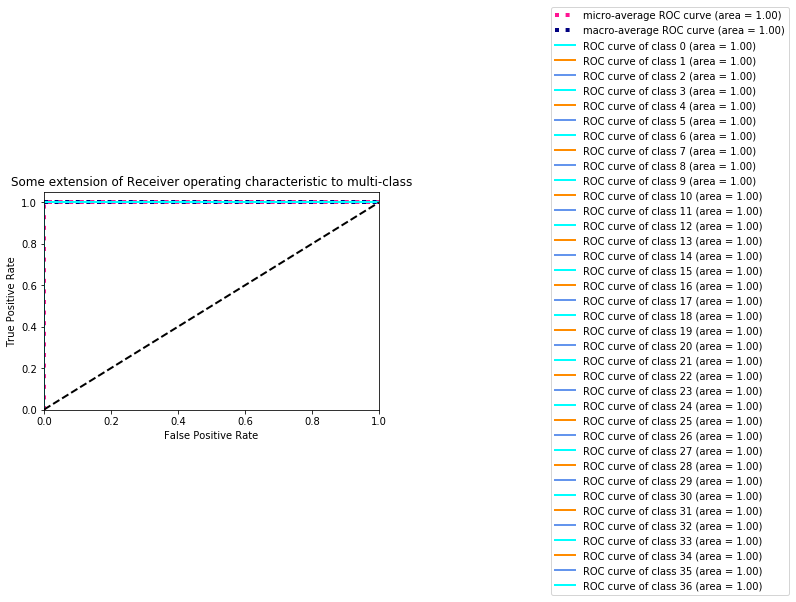

In [20]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_labels):
    fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_labels)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_labels):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_labels

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_labels), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.savefig('ROC.png',dpi=300, bbox_inches='tight')
plt.show()

In [21]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_labels):
    precision[i], recall[i], _ = precision_recall_curve(y_train[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_train[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_train.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_train, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


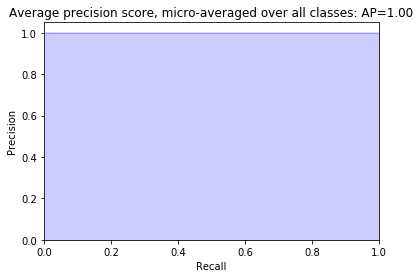

In [24]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                 #**step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.savefig('avg_precision_score',dpi=300)
plt.show()


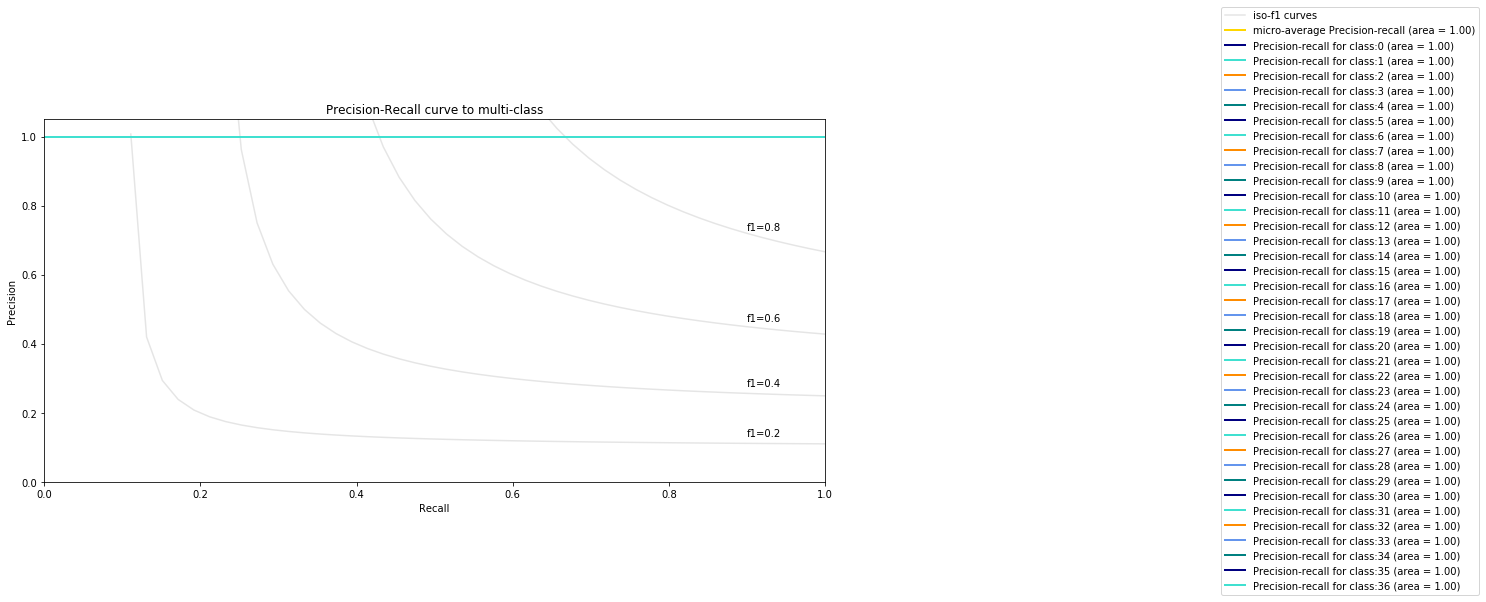

In [23]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(14, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(num_labels), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc='center left' , prop=dict(size=10),bbox_to_anchor=(1.5, 0.5))
plt.savefig('prec-recall.png',dpi=300, bbox_inches='tight')
plt.show()